In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
# Load your dataset
# Assume you have a CSV file with a 'Date' and 'Close' column
df = pd.read_csv('Data/TSLA.csv')  # Replace with your file path

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use 'Close' prices for prediction
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [4]:
# Create a function to prepare the data for the LSTM model
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare the training and testing datasets
time_step = 60  # Number of previous days to consider
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [5]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\HP\PycharmProjects\pythonProject2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 2.2218e-04
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.0330e-06
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 6.8222e-06
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 6.8789e-06
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.8146e-06
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.3056e-06
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.6079e-06
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.7508e-06
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.8756e-06
Epoch 10/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.4078e-06
Epoch 11/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.1428e-06
Epoch 12/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.2801e-06
Epoch 13/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 4.3378e-06
Epoch 14/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 3.4304e-06
E

In [7]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse the predictions to get actual stock prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


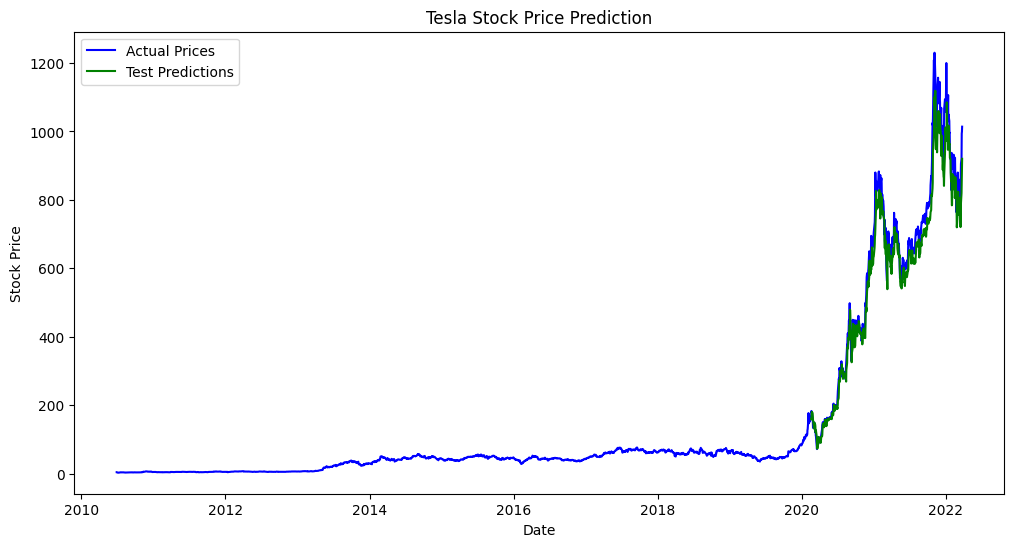

In [8]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, data, label='Actual Prices', color='blue')
plt.plot(df.index[train_size + time_step + 1:], test_predict, label='Test Predictions', color='green')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [9]:
# Save the model to a file
model.save('tesla_stock_model.h5')  # Save as a single HDF5 file

In [10]:
from tensorflow.keras.models import load_model

# Load the model from the file
loaded_model = load_model('tesla_stock_model.h5')